In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Load the respective datasets for features or no features
X_train, y_train, X_test, y_test = joblib.load('/content/drive/MyDrive/notebook_data/exports/train_test/train_test_split_v4.pkl')
X_trainf, y_trainf, X_testf, y_testf = joblib.load('/content/drive/MyDrive/notebook_data/exports/train_test/train_test_split_features_v2.pkl')

# Load the lightgbm models
lgbm_model_f_sw, lgbm_encoder_f_sw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/lgbm/lgbm_model_encoder_features_sw.pkl')
lgbm_model_f_nsw, lgbm_encoder_f_nsw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/lgbm/lgbm_model_encoder_features_noSw.pkl')
lgbm_model_nf_sw, lgbm_encoder_nf_sw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/lgbm/lgbm_model_encoder_nofeatures_sw.pkl')
lgbm_model_nf_nsw, lgbm_encoder_nf_nsw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/lgbm/lgbm_model_encoder_nofeatures_noSw.pkl')

# Load the xgboost models
xgb_model_nf_nsw, xgb_encoder_nf_nsw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/xgb/xgb_model_encoder_nofeatures_noSw.pkl')
xgb_model_nf_sw, xgb_encoder_nf_sw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/xgb/xgb_model_encoder_nofeatures_noSw.pkl')
xgb_model_f_sw, xgb_encoder_f_sw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/xgb/xgb_model_encoder_features_sw.pkl')
xgb_model_f_nsw, xgb_encoder_f_nsw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/xgb/xgb_model_encoder_features_noSw.pkl')

# Load the linearsvc models
lsvc_model_f_sw, lsvc_encoder_f_sw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/linearsvc/linsvc_model_encoder_stopwords.pkl')
lsvc_model_f_nsw, lsvc_encoder_f_nsw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/linearsvc/linsvc_model_encoder_no_stopwords.pkl')
lsvc_model_nf_sw, lsvc_encoder_nf_sw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/linearsvc/linsvc_model_encoder_stopwords_nofeatures.pkl')
lsvc_model_nf_nsw, lsvc_encoder_nf_nsw = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/linearsvc/linsvc_model_encoder_no_stopwords_nofeatures.pkl')

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
# Get the model predictions for each of them
feature_models = [
    lgbm_model_f_sw,
    lgbm_model_f_nsw,
    xgb_model_f_sw,
    xgb_model_f_nsw,
    lsvc_model_f_sw,
    lsvc_model_f_nsw
]

no_feature_models = [
    lgbm_model_nf_sw,
    lgbm_model_nf_nsw,
    xgb_model_nf_sw,
    xgb_model_nf_nsw,
    lsvc_model_nf_sw,
    lsvc_model_nf_nsw
]

feature_predictions = [
    lgbm_encoder_f_sw.inverse_transform(lgbm_model_f_sw.predict(X_testf)),
    lgbm_encoder_f_nsw.inverse_transform(lgbm_model_f_nsw.predict(X_testf)),
    xgb_encoder_f_sw.inverse_transform(xgb_model_f_sw.predict(X_testf)),
    xgb_encoder_f_nsw.inverse_transform(xgb_model_f_nsw.predict(X_testf)),
    lsvc_encoder_f_sw.inverse_transform(lsvc_model_f_sw.predict(X_testf)),
    lsvc_encoder_f_nsw.inverse_transform(lsvc_model_f_nsw.predict(X_testf))
]

no_feature_predictions = [
    lgbm_encoder_nf_sw.inverse_transform(lgbm_model_nf_sw.predict(X_test)),
    lgbm_encoder_nf_nsw.inverse_transform(lgbm_model_nf_nsw.predict(X_test)),
    xgb_encoder_nf_sw.inverse_transform(xgb_model_nf_sw.predict(X_test)),
    xgb_encoder_nf_nsw.inverse_transform(xgb_model_nf_nsw.predict(X_test)),
    lsvc_encoder_nf_sw.inverse_transform(lsvc_model_nf_sw.predict(X_test)),
    lsvc_encoder_nf_nsw.inverse_transform(lsvc_model_nf_nsw.predict(X_test))
]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [10]:
feature_model_names = [
    "LightGBM Model +Features, Stop Words Included",
    "LightGBM Model +Features, Stop Words Removed",
    "XGBoost Model +Features, Stop Words Included",
    "XGBoost Model +Features, Stop Words Removed",
    "LinearSVC Model +Features, Stop Words Included",
    "LinearSVC Model +Features, Stop Words Removed"
]

no_feature_model_names = [
    "LightGBM Model, No Features, Stop Words Included",
    "LightGBM Model, No Features, Stop Words Removed",
    "XGBoost Model, No Features, Stop Words Included",
    "XGBoost Model, No Features, Stop Words Removed",
    "LinearSVC Model, No Features, Stop Words Included",
    "LinearSVC Model, No Features, Stop Words Removed"
]

In [11]:
# Convert y_test to text
ytestf_text = lgbm_encoder_f_sw.inverse_transform(y_testf)
ytest_text = lgbm_encoder_nf_sw.inverse_transform(y_test)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def create_and_normalize_confusion_matrix(y_true, y_pred, title, labels, ax=None):
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  # Create heatmap with actual labels
  if ax is None:
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                     xticklabels=labels, yticklabels=labels)
  else:
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=labels, yticklabels=labels, ax=ax)

  ax.set_title(title)
  ax.set_xlabel("Predicted Labels")
  ax.set_ylabel("True Labels")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')


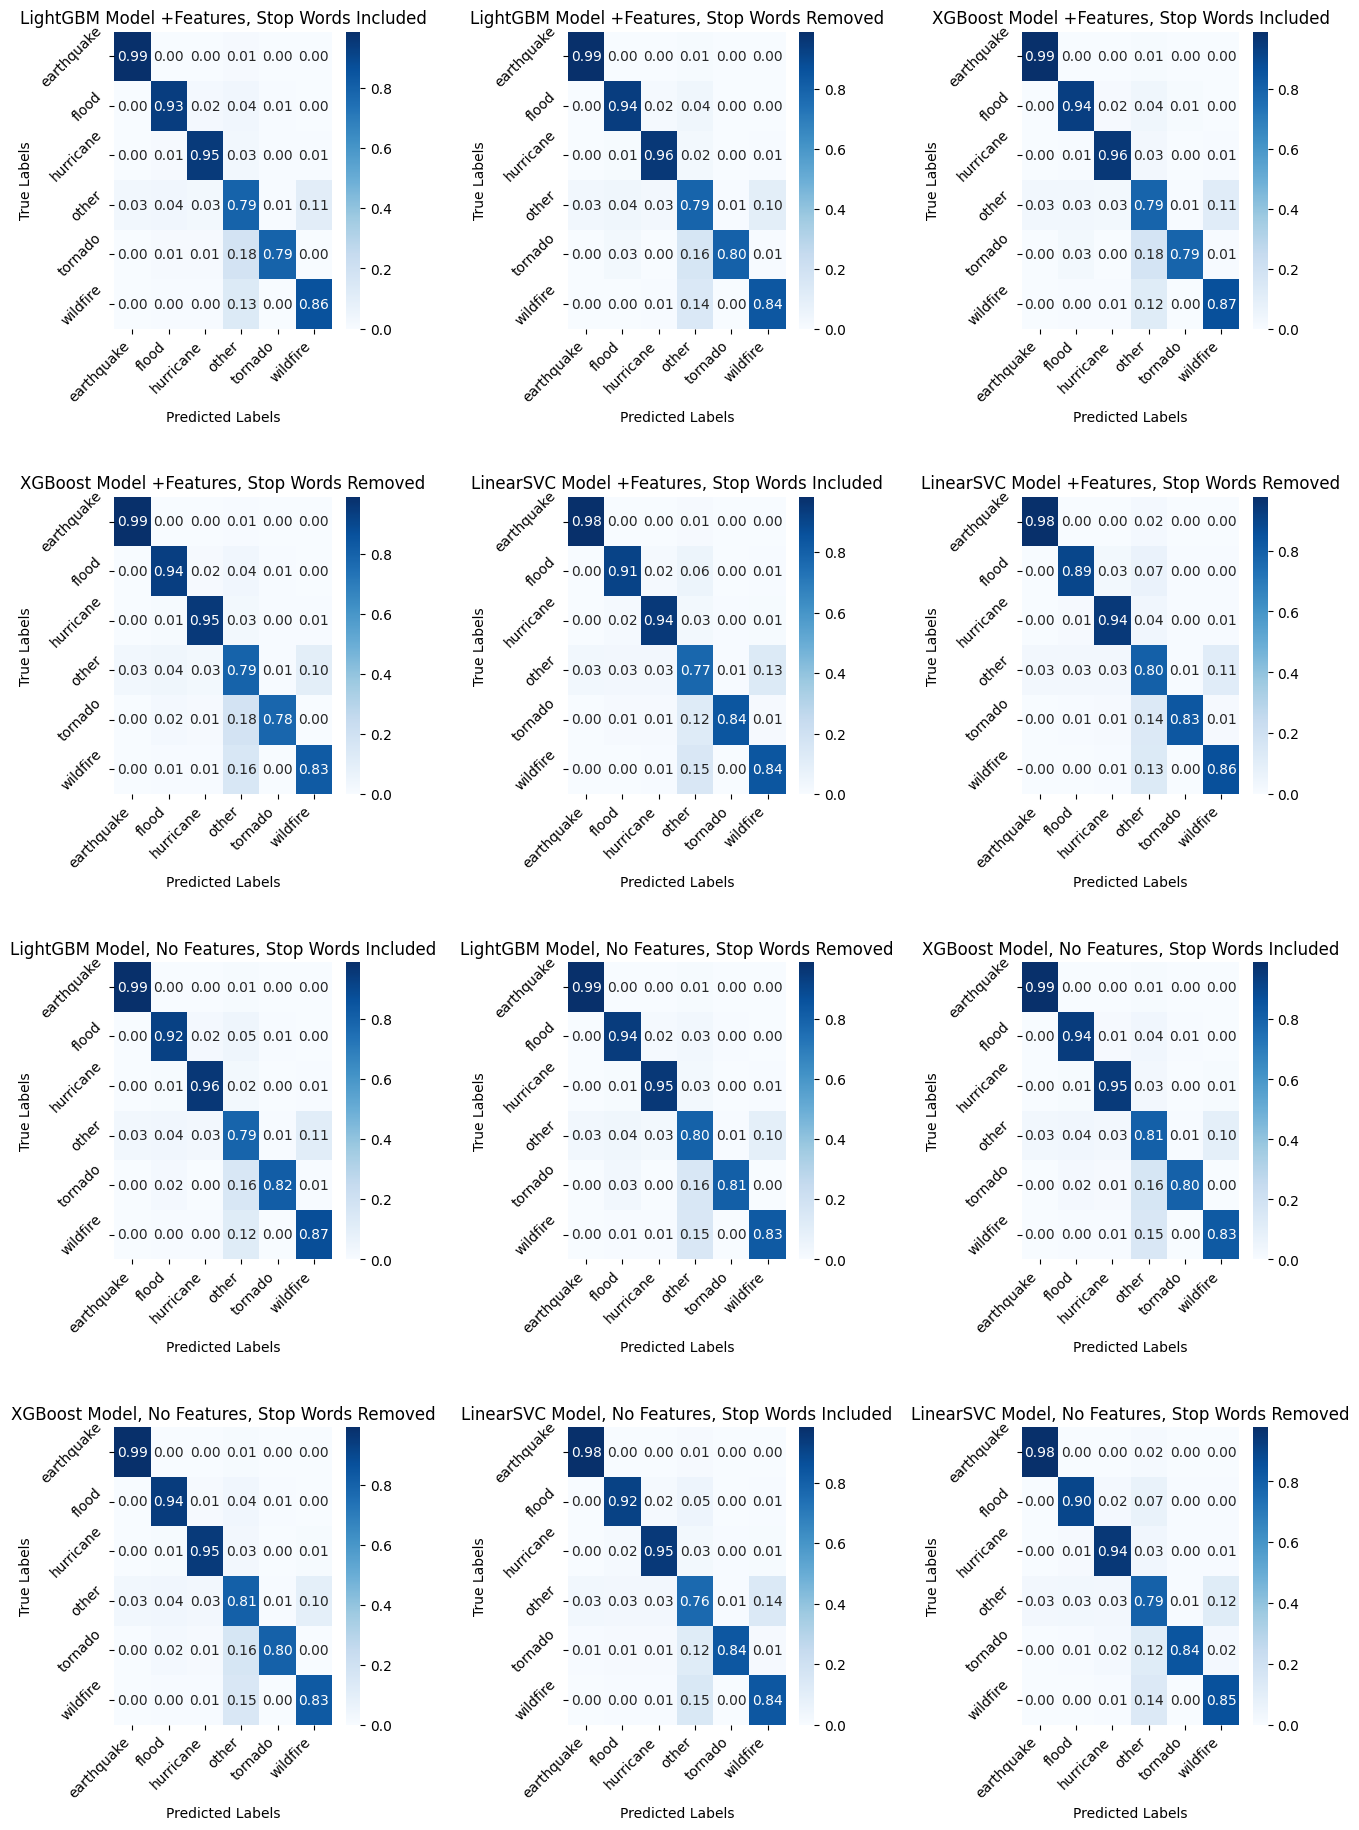

In [19]:
import math

num_models = len(feature_models) + len(no_feature_models)
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(num_models / num_cols)  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.tight_layout(pad=10.0) # Add padding between subplots

# Plot feature models
current_plot = 0
for i, model in enumerate(feature_models):
    row = current_plot // num_cols
    col = current_plot % num_cols
    create_and_normalize_confusion_matrix(ytestf_text, feature_predictions[i],
                                           feature_model_names[i],
                                           lgbm_encoder_f_sw.classes_, ax=axes[row, col])
    current_plot += 1

# Plot no feature models
for i, model in enumerate(no_feature_models):
    row = current_plot // num_cols
    col = current_plot % num_cols
    create_and_normalize_confusion_matrix(ytest_text, no_feature_predictions[i],
                                           no_feature_model_names[i],
                                           lgbm_encoder_nf_sw.classes_, ax=axes[row, col])
    current_plot += 1


plt.show() # Display the grid of plots

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [23]:
# tables comparing weighted f1 scores, weighted precision scores, and weighted recall scores for each model

import pandas as pd

# Calculate metrics for each model
def calculate_metrics(y_true, y_pred):
  f1 = f1_score(y_true, y_pred, average='weighted')
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  return f1, precision, recall

# Store metrics in lists
models = feature_model_names + no_feature_model_names
predictions = feature_predictions + no_feature_predictions
y_true_list = [ytestf_text] * len(feature_predictions) + [ytest_text] * len(no_feature_predictions)

f1_scores = []
precision_scores = []
recall_scores = []
for i in range(len(models)):
  f1, precision, recall = calculate_metrics(y_true_list[i], predictions[i])
  f1_scores.append(f1)
  precision_scores.append(precision)
  recall_scores.append(recall)

# Create DataFrame for the table
df_metrics = pd.DataFrame({
    'Model': models,
    'Weighted F1-Score': f1_scores,
    'Weighted Precision': precision_scores,
    'Weighted Recall': recall_scores
})

# Display the table
df_metrics


,Model,Weighted F1-Score,Weighted Precision,Weighted Recall
0,"LightGBM Model +Features, Stop Words Included",0.898576,0.899153,0.898464
1,"LightGBM Model +Features, Stop Words Removed",0.898712,0.899300,0.898863
2,"XGBoost Model +Features, Stop Words Included",0.903468,0.903544,0.903651
3,"XGBoost Model +Features, Stop Words Removed",0.895285,0.896314,0.895272
4,"LinearSVC Model +Features, Stop Words Included",0.887972,0.888530,0.887692
5,"LinearSVC Model +Features, Stop Words Removed",0.892623,0.893970,0.891881
6,"LightGBM Model, No Features, Stop Words Included",0.903070,0.903132,0.903252
7,"LightGBM Model, No Features, Stop Words Removed",0.897917,0.899110,0.897866
8,"XGBoost Model, No Features, Stop Words Included",0.898588,0.899807,0.898464
9,"XGBoost Model, No Features, Stop Words Removed",0.898588,0.899807,0.898464
